# Lending Clubs Case Study

In [1]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\WNS-U330743\MLAI\EDA\loan.csv")
df.head()

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\2658935756.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\WNS-U330743\MLAI\EDA\loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(39717, 111)

We have total 39717 rows and 111 columns in our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Out of 111 columns, we have 74 columns with datatype float64, 13 columns as int64, 24 columns as object type columns.

### Clean the dataset

In [5]:
# Get rid of empty columns
df.dropna(axis=1, how='all', inplace=True)

In [6]:
print(df.shape)
df.info()

(39717, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc         

After dropping the empty columns, now we have only 57 columns. By datatype float = 20, int64 = 13, and object = 24

Next we will check how many null values are present in each column and get rid of them.

In [7]:
# get all the empty cells
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Above details do not give a very good understanding of then empty values in the column. So lets check their percentages. 

In [11]:
100*df.isnull().sum()/len(df)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
# Lets remove columns with more than 90% of the values.
row_count=df.shape[0]
remove_col1 = df.columns[100*(df.isnull().sum()/row_count)>90]
remove_col1

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [14]:
# After getting rid of above 2 columns, we now we only have 55 columns in our dataset. 
df.drop(columns=remove_col1, axis=1, inplace=True)
df.shape

(39717, 55)

Apart from that we have 2 columns with high missing values. Based on the Dictionary, they are not really useful for our analysis.

These columns are desc (32.580507) and mths_since_last_delinq (64.662487). So let remove them

In [15]:
remove_col2 = ['desc', 'mths_since_last_delinq']
df.drop(columns=remove_col2, axis=1, inplace=True)
df.shape

(39717, 53)

We have now removed the empty value columns from our data. What we have is only 53 columns. 

Lets examine other columns now. 

DataFrame.info gives us the details of each column and its datatype. We can also use DataFrame.dtypes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [19]:
#lets check unique values in each column using below function.
df.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [20]:
#below columns have only 1 value in them. So they will not be very usful fo the analysis
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

Lets clean some columns before we remove more columns.

In [21]:
# Lets check each col. At index 6, we have int_rate with object as datatype. 
df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [22]:
# We have 0 null values in the column.
df['int_rate'].isnull().sum()

0

In [23]:
# Because there is % sign in the values, its considered as object.
df['int_rate'] = df['int_rate'].apply(lambda x : x.replace('%', '') )
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [24]:
# But the datatype is still object. Lets convert it into float as it should be.
df['int_rate'] = pd.to_numeric(df['int_rate'])
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

Now we see, int_rate converted into float type as it should be.

In [25]:
# Next, lets work on column emp_length                  
df['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [26]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [27]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [28]:
# Lets check how many empty rows we have compared to total rows = 39717.
100*df['emp_length'].isnull().sum()/df.shape[0]
# We can get rid of these rows as it wont affect our dataset of 39k.

2.7066495455346575

In [29]:
total_rows = df.shape[0]
total_rows

39717

In [30]:
df=df[~df['emp_length'].isnull()]
df.shape

(38642, 53)

In [31]:
print('Now we only have ' + str(df.shape[0]) + ' rows as compared to earlier rows ' + str(total_rows))

Now we only have 38642 rows as compared to earlier rows 39717


In [32]:
df['emp_length'] = df['emp_length'].apply(lambda x : x.replace('years', '')).apply(lambda x : x.replace('year',''))
df['emp_length'].head()

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\1743224106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'] = df['emp_length'].apply(lambda x : x.replace('years', '')).apply(lambda x : x.replace('year',''))


0    10+ 
1    < 1 
2    10+ 
3    10+ 
4      1 
Name: emp_length, dtype: object

In [33]:
df['emp_length'].value_counts()
# Based on below result we can see, there are only 10 unique values and 2 of them have special characters. 
# We have to replace <1 as 0 and 10+ as 10 to get only numeric values for analysis.

10+     8879
< 1     4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
Name: emp_length, dtype: int64

In [34]:
df['emp_length'] = df['emp_length'].apply(lambda x : 0 if "<" in x else x)
df['emp_length'] = df['emp_length'].apply(lambda x : str(x).replace('10+', '10'))
df['emp_length'].value_counts()

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\877116263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'] = df['emp_length'].apply(lambda x : 0 if "<" in x else x)
C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\877116263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'] = df['emp_length'].apply(lambda x : str(x).replace('10+', '10'))


10     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: emp_length, dtype: int64

In [35]:
print(df['emp_length'].dtype)

object


In [36]:
df['emp_length'] = pd.to_numeric(df['emp_length'])

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\14184927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'] = pd.to_numeric(df['emp_length'])


In [37]:
df['emp_length'].dtype

dtype('int64')

emp_length is not converted into integer type column.

In [38]:
df['emp_length'].value_counts()
#Now our column emp_length looks clean.

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

There are other columns such as term which has only 2 values as 36 months and 60 months. But we dont have to convert them to integer as they are categorical columns. 

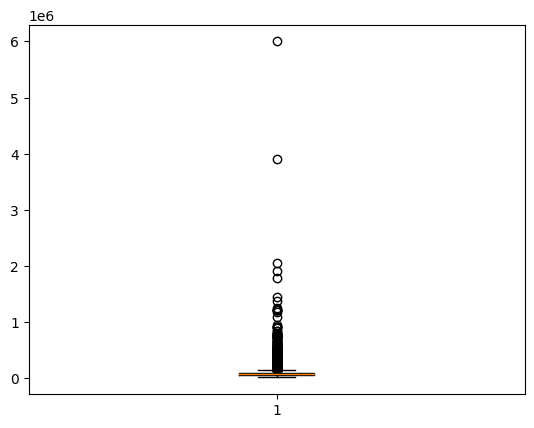

In [39]:
# Next, lets Check the column annual_inc. It seems it has too many outliers. 
plt.boxplot(df['annual_inc'])
plt.show()
# below plot shows there are clearly some outliers. Lets remove them. 

In [41]:
# Lets check the values present in diffrent ranges.
df['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     60000.00
0.75     83199.99
0.90    117000.00
0.95    143975.00
0.97    168000.00
0.98    190000.00
0.99    235000.00
Name: annual_inc, dtype: float64

In [42]:
# Above details show us huge difference in the 90th %ile and 99 %ile. Lets check similar details using describe()
df['annual_inc'].describe()

count    3.864200e+04
mean     6.960828e+04
std      6.425320e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.319999e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [43]:
# Based on the above 2 results, we can understand that we have to get rid of data > 95 %ile
df = df[df['annual_inc']<=df['annual_inc'].quantile(0.95)]
df.shape

(36709, 53)

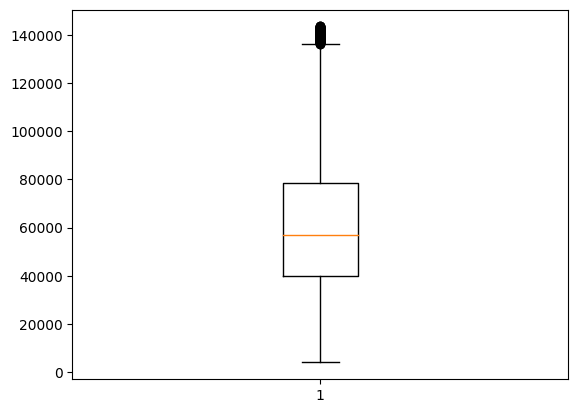

In [44]:
# Lets check the same details again 
plt.boxplot(df['annual_inc'])
plt.show()
# Now we see our data correctly.

There are 2 more columns which might have the outliers. Those are loan_amnt and funded_amnt_inv. Lets check those columns as well.

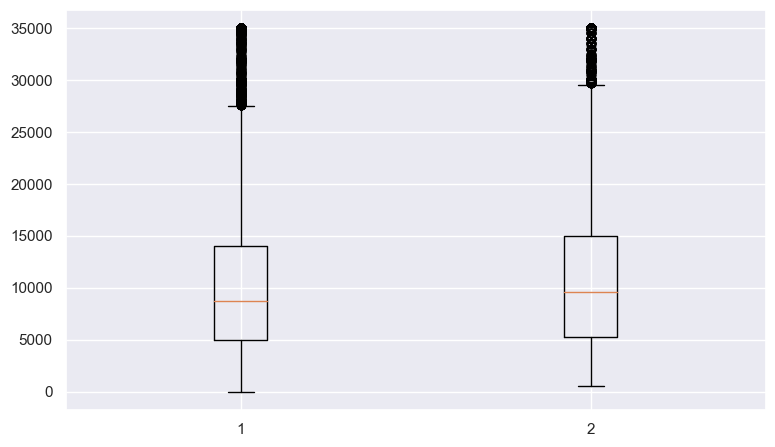

In [45]:
sns.set()
fig = plt.figure(figsize=(7, 4))
ax = fig.add_axes([0,0, 1,1])
bp = ax.boxplot([df['funded_amnt_inv'], df['loan_amnt']])
plt.show()
# Above plot shows that both columns have pretty much simillar and equal distribution of the values. No need to remove anything.

In [46]:
# we now have total 53 columns now.
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [47]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [48]:
# Lets check acc_now_delinq column
df.acc_now_delinq.describe()

count    36709.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64

In [49]:
df.acc_now_delinq.value_counts()
# all the rows in this column are 0. No point in using it. 

0    36709
Name: acc_now_delinq, dtype: int64

In [50]:
# all the rows are having 0 value.
df.chargeoff_within_12_mths.value_counts()

0.0    36664
Name: chargeoff_within_12_mths, dtype: int64

In [51]:
df.chargeoff_within_12_mths.describe()
# This col also has 0 values only. We will have to get rid of them.

count    36664.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [52]:
df.chargeoff_within_12_mths.isnull().sum()

45

In [53]:
# all the rows are having 0 value.
df.delinq_amnt.value_counts()

0    36709
Name: delinq_amnt, dtype: int64

In [54]:
# all the rows are having 0 value.
df.delinq_amnt.describe()

count    36709.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: delinq_amnt, dtype: float64

In [55]:
df.pub_rec_bankruptcies.value_counts()

0.0    34519
1.0     1526
2.0        6
Name: pub_rec_bankruptcies, dtype: int64

In [56]:
df.pub_rec_bankruptcies.isnull().sum()

658

In [57]:
df.tax_liens.value_counts()

0.0    36679
Name: tax_liens, dtype: int64

In [58]:
df.collections_12_mths_ex_med.value_counts()

0.0    36664
Name: collections_12_mths_ex_med, dtype: int64

In [59]:
df.collection_recovery_fee.value_counts()

0.0000      33202
2.0000         12
3.7100          9
1.2000          9
1.6000          8
            ...  
11.9195         1
202.7340        1
4.3100          1
1.4250          1
0.2300          1
Name: collection_recovery_fee, Length: 2440, dtype: int64

We see above columns are only having 0 values. So lets get rid of them. 

In [60]:
df.delinq_2yrs.value_counts()

0     32751
1      3050
2       610
3       203
4        59
5        18
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

Lets create a list of all the columns we want to remove.

In [61]:
#all these columns have 0 values so we can get rid of them. 'acc_now_delinq', 'delinq_amnt', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med']
remove_col3 = ['acc_now_delinq', 'delinq_amnt', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med']
df.drop(columns=remove_col3, axis=1, inplace=True)
df.shape

(36709, 48)

Till now we have removed below columns.

In [62]:
# so far we have removed below columns.
print(remove_col1)
print(remove_col2)
print(remove_col3)

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')
['desc', 'mths_since_last_delinq']
['acc_now_delinq', 'delinq_amnt', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med']


In [63]:
# as of now we have only 48 columns.
df.shape

(36709, 48)

In [64]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [66]:
# we have few columns which has only single value.
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type'], dtype='object')

In [67]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [68]:
df['pub_rec_bankruptcies'].value_counts()

0.0    34519
1.0     1526
2.0        6
Name: pub_rec_bankruptcies, dtype: int64

In [69]:
# We see there are 1526 ppl who has declared bankcruptcies 1 time and 6 ppl who has done it 2 times. 
# There are also some Null values. Lets remove them and keep other values.
df = df[~(df['pub_rec_bankruptcies'].isnull())]
df.shape

(36051, 48)

In [70]:
#We need to update the row count variable.
print('Earlier row count was ' + str(row_count))
row_count=df.shape[0]
print('Current row count is ' + str(row_count))

Earlier row count was 39717
Current row count is 36051


In [77]:
# Rechecking the columns with blank / null values in them. 
100*(df.isnull().sum()/row_count)

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  3.411833
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
pymnt_plan                 0.000000
url                        0.000000
purpose                    0.000000
title                      0.027738
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0

In [78]:
# Rechecking the columns with blank / null values in them. 
df.columns[100*(df.isnull().sum()/row_count)==0]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [79]:
# Rechecking the columns with blank / null values in them. 
df.columns[100*(df.isnull().sum()/row_count)>0]

Index(['emp_title', 'title', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [80]:
#Above colunms have some null values. Lets check them one by one.
# 1. emp_title
df['emp_title'].isnull().sum()

1230

In [81]:
# 2. title
df['title'].isnull().sum()

10

In [82]:
# 3. revol_util
df['revol_util'].isnull().sum()

45

In [83]:
# 4. last_pymnt_d
df.last_pymnt_d.isnull().sum()

66

In [84]:
# 5. last_credit_pull_d
df.last_credit_pull_d.isnull().sum()

1

In [85]:
# Empty ros are very less compared to our total rows. So removing the rows with null values in those 5 cols. 
df=df[~df.emp_title.isnull()]
df=df[~df.emp_length.isnull()]
df=df[~df.title.isnull()]
df=df[~df.revol_util.isnull()]
df=df[~df.last_pymnt_d.isnull()]

In [86]:
df.shape

(34708, 48)

In [87]:
#We need to update the row count variable.
print('Earlier row count was ' + str(row_count))
row_count=df.shape[0]
print('Current row count is ' + str(row_count))

Earlier row count was 36051
Current row count is 34708


In [88]:
# Rechecking the columns with blank / null values in them. No columns with empty values.
df.columns[100*(df.isnull().sum()/row_count)>0]

Index([], dtype='object')

Now that our data is clean, let us now check the columns. Which columns should we use for the analysis of which kind.

### Data Analysis

Now we need to check what each column contains what value. Basis that we will analyze the pattern in the data.

In [89]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0.0


In [90]:
# below are the columns we have. 
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

Now we can understand that there are few columns which come into picture after the loan is sanctioned. Such columns will not be useful to analyse if customer would default on their loan.

1. 'id', 'member_id' , 'url' are the columns used to give uniqueness to the row. They are not needed.

2. 'payment_plan' column has only 'n' value in all rows. 'application_type' only has 'Individual' so they are not needed. 

3. 'zip_code' is the demograpics. Its not needed. However, we might get some inferences based on state - addr_state

4. 'inq_last_6mths', 'earliest_cr_line', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d' , 'open_acc', 'pub_rec', 'policy_code', These columns come after loan is given. Not needed. 

In [91]:
# also below columns have only 1 value in the columns. 
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type'], dtype='object')

In [92]:
remove_col4 = ['id', 'member_id', 'url', 'title',
       'zip_code', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type']
print(len(remove_col4))
remove_col4

27


['id',
 'member_id',
 'url',
 'title',
 'zip_code',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'policy_code',
 'application_type']

In [93]:
df.drop(columns=remove_col4, axis=1, inplace=True)
df.shape

(34708, 21)

In [94]:
# after removing these columns we have below columns left in our dataset. 
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'initial_list_status', 'pub_rec_bankruptcies'],
      dtype='object')

Now we need to check if the customer would default or not. That is given to us in loan_status column. So lets check it

In [81]:
df['loan_status'].value_counts()
#Out of below types, we cant really use Current Loan accounts data. We can only use Fully Paid and Charged Off. 

Fully Paid     28952
Charged Off     4768
Current          988
Name: loan_status, dtype: int64

In [96]:
# so Lets remove ongoing loans.
df1 = df[~(df['loan_status']=="Current")]

In [97]:
# This is our final dataset.
df1.shape

(33720, 21)

In [98]:
# Lets check our target column.
df1['loan_status'].value_counts()

Fully Paid     28952
Charged Off     4768
Name: loan_status, dtype: int64

In [99]:
# We understand that our Mean of the colunmns is 
df1['loan_status'].value_counts()*100/df1.shape[0]

Fully Paid     85.860024
Charged Off    14.139976
Name: loan_status, dtype: float64

#### Lets create some functions to understand the dataset. We will analyse all the columns against the target column 'loan_status'

In [100]:
#Lets add this to important features list.
imp_features=[]

In [101]:
print('Mean of the Loan Amount' , df1.groupby('loan_status')['loan_amnt'].mean())
print('-'*40)
print('Median of the Loan Amount' , df1.groupby('loan_status')['loan_amnt'].median())

Mean of the Loan Amount loan_status
Charged Off    12012.180159
Fully Paid     10598.329131
Name: loan_amnt, dtype: float64
----------------------------------------
Median of the Loan Amount loan_status
Charged Off    10000.0
Fully Paid      9250.0
Name: loan_amnt, dtype: float64


In [103]:
df1.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4768.0,12012.180159,7889.256446,1000.0,6000.0,10000.0,16000.0,35000.0
Fully Paid,28952.0,10598.329131,6885.511141,500.0,5100.0,9250.0,14500.0,35000.0


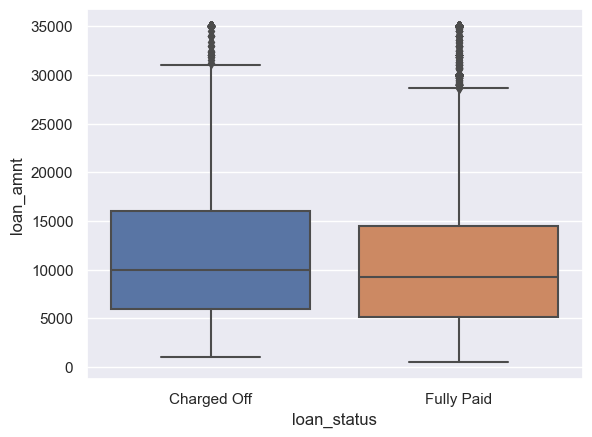

In [104]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df1)
plt.show()

In [105]:
# loan amount seems important for analysis
imp_features.append('loan_amt')

In [106]:
print('Mean of the Funded Loan Amount' , df1.groupby('loan_status')['funded_amnt'].mean())
print('-'*40)
print('Median of the Loan Amount' , df1.groupby('loan_status')['funded_amnt'].median())

Mean of the Funded Loan Amount loan_status
Charged Off    11673.107173
Fully Paid     10361.772071
Name: funded_amnt, dtype: float64
----------------------------------------
Median of the Loan Amount loan_status
Charged Off    10000.0
Fully Paid      9000.0
Name: funded_amnt, dtype: float64


In [107]:
df1.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4768.0,11673.107173,7569.297607,1000.0,5743.75,10000.0,16000.0,35000.0
Fully Paid,28952.0,10361.772071,6654.200616,500.0,5000.00,9000.0,14000.0,35000.0


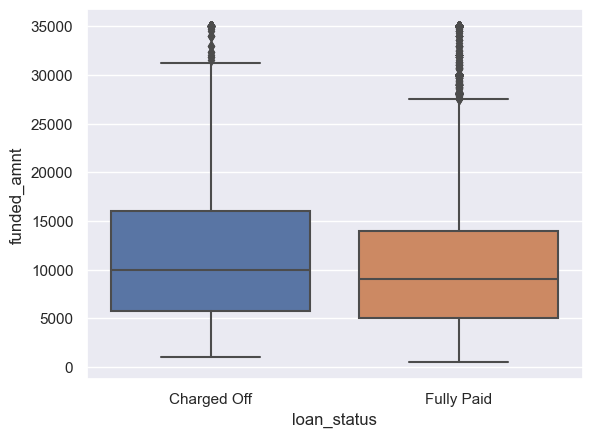

In [108]:
sns.boxplot(x='loan_status', y='funded_amnt', data=df1)
plt.show()

In [109]:
print('Mean of the Funded Loan Amount' , df1.groupby('loan_status')['funded_amnt_inv'].mean())
print('-'*40)
print('Median of the Loan Amount' , df1.groupby('loan_status')['funded_amnt_inv'].median())

Mean of the Funded Loan Amount loan_status
Charged Off    11001.815642
Fully Paid      9978.765672
Name: funded_amnt_inv, dtype: float64
----------------------------------------
Median of the Loan Amount loan_status
Charged Off    9700.0
Fully Paid     8550.0
Name: funded_amnt_inv, dtype: float64


In [110]:
df1.groupby('loan_status')['funded_amnt_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4768.0,11001.815642,7436.757853,0.0,5000.0,9700.0,15000.0,35000.0
Fully Paid,28952.0,9978.765672,6568.238322,0.0,5000.0,8550.0,13550.0,35000.0


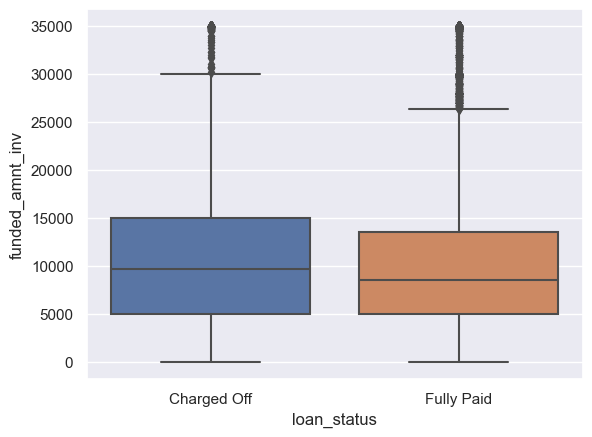

In [111]:
sns.boxplot(x='loan_status', y='funded_amnt_inv', data=df1)
plt.show()

Above graph shows that the mean value of funded amount invested is little higher for Charged Off loans. 

Lets check Term of the loan next.

In [112]:
df1.groupby('loan_status')['term'].value_counts()

loan_status  term      
Charged Off   36 months     2639
              60 months     2129
Fully Paid    36 months    22588
              60 months     6364
Name: term, dtype: int64

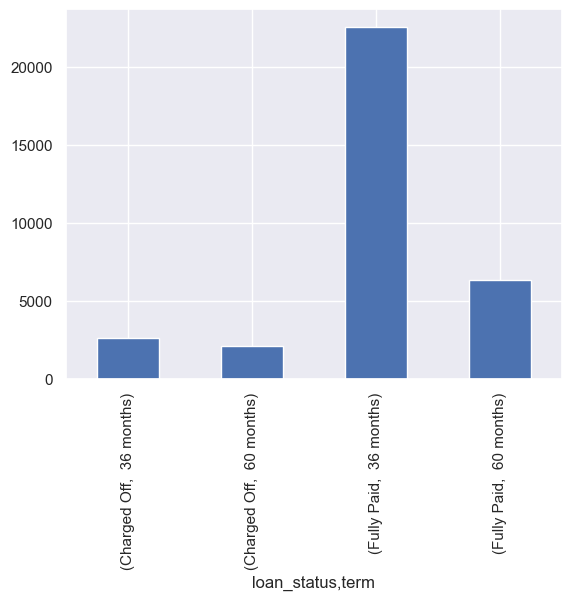

In [113]:
df1.groupby('loan_status')['term'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='term', ylabel='count'>

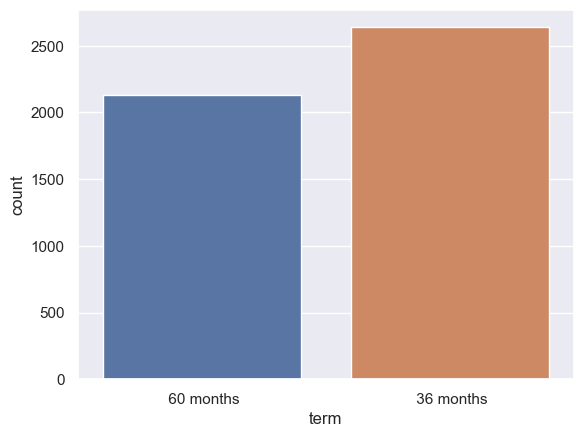

In [114]:
# Charged Off loans seems little high in number for 36 months term. Lets plot the graph for only those criteria.
sns.countplot(x='term', data=df1[df1['loan_status']=='Charged Off'])
#We see that there are more charged of loans for Term of 36 months. That means Short term loans are high risk.

Grade is one more column we have. Now that is a categorical column. Lets sort it and check it. 

In [117]:
ordered_grades=df1.grade.unique()
ordered_grades.sort()
ordered_grades

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [118]:
df1['grade'].value_counts()

B    10241
A     8806
C     6874
D     4448
E     2280
F      823
G      248
Name: grade, dtype: int64

<Axes: >

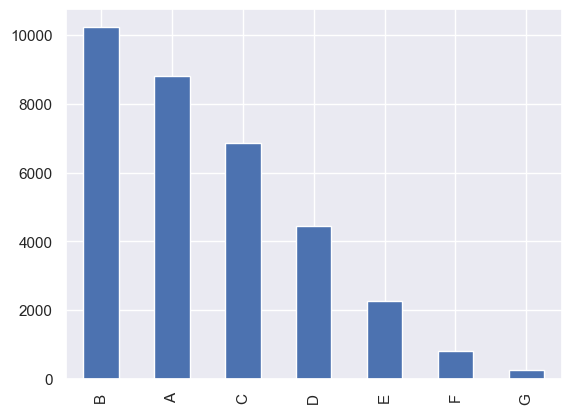

In [119]:
df1['grade'].value_counts().plot(kind='bar')

We see that there is clearly an order in them. Lets check grades againsts our target column.

Text(0.5, 1.0, 'Distribution of Term For Grades for all cases')

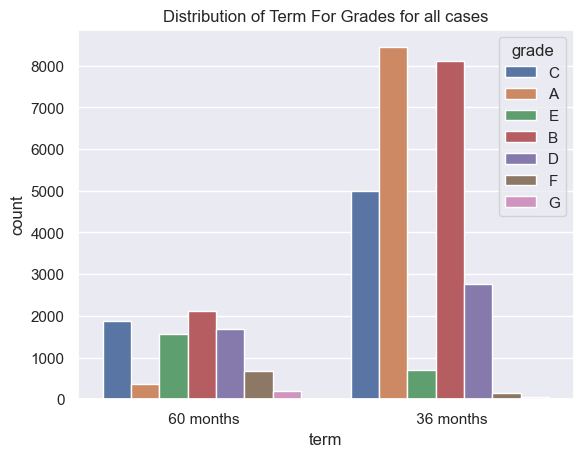

In [121]:
sns.countplot(x='term', data=df1, hue='grade')
plt.title('Distribution of Term For Grades for all cases')

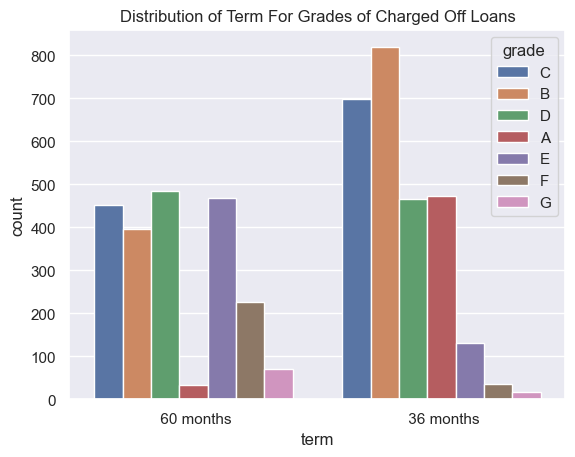

In [122]:
sns.countplot(x='term', data=df1[df1['loan_status']=='Charged Off'], hue='grade')
plt.title('Distribution of Term For Grades of Charged Off Loans')
plt.show()

We can see that for 60 Months term, Grade C, B, D, E are having high charged off loans. 

We can see that for 36 Months term, Grade C, B, D, A are having high charged off loans. 

Text(0.5, 1.0, 'Distribution of Loan Amount across Grades')

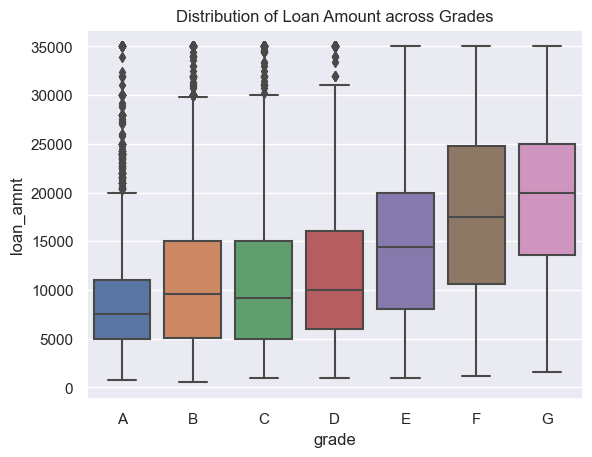

In [123]:
sns.boxplot(x='grade',y='loan_amnt', data=df1, order=ordered_grades)
plt.title('Distribution of Loan Amount across Grades')

Text(0.5, 1.0, 'Distribution of Interest Rate Across Grades')

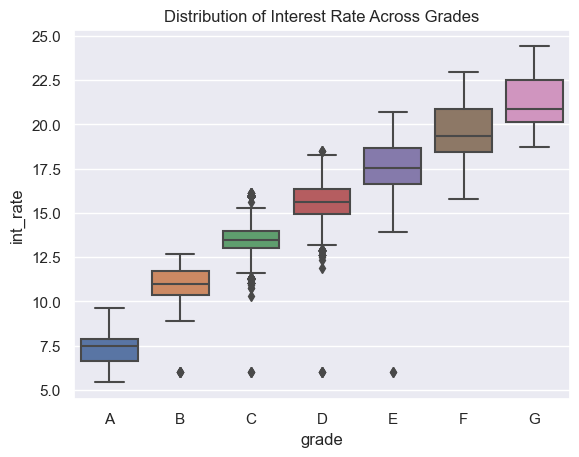

In [124]:
sns.boxplot(x='grade', y='int_rate', data=df1, order=ordered_grades)
plt.title('Distribution of Interest Rate Across Grades')

For the grades A to G, the loan amount increases and also the interest rate also increases.

Lets check the same thing for only charged off loans. 

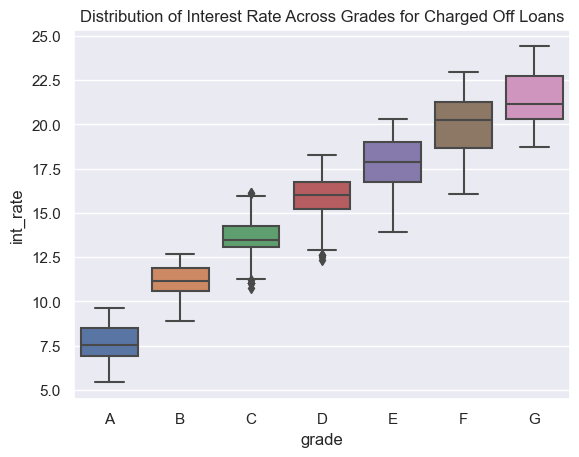

In [125]:
sns.boxplot(x='grade', y='int_rate', data=df1[df1['loan_status']=='Charged Off'], order=ordered_grades)
plt.title('Distribution of Interest Rate Across Grades for Charged Off Loans')
plt.show()

We see that there are higher interest rates are applied to subsequent grades 

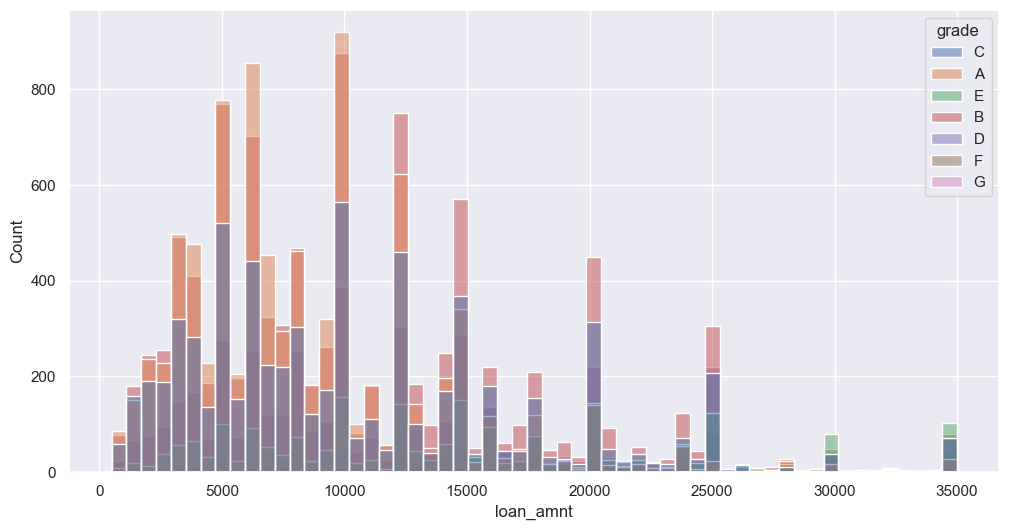

In [129]:
# Lets change figure size to see the plot.
plt.rcParams['figure.figsize'] = (12, 6)
sns.histplot(x = 'loan_amnt', hue = 'grade',data = df1)
plt.show()

In [130]:
# Adding the columns Term and Grades to the Imp features as 
imp_features.append('term')
imp_features.append('grade')

In [131]:
imp_features

['loan_amt', 'term', 'grade']

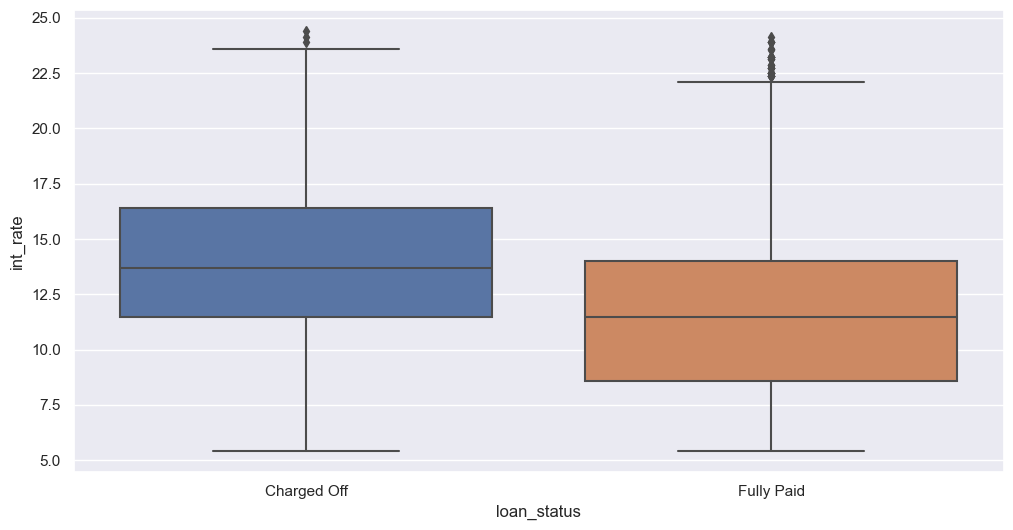

In [132]:
# int_rate is not a useful feature as there are both status records for each term
sns.boxplot(x=df1.loan_status, y=df1.int_rate)
plt.show()

In [133]:
# int_rate seems higher for the charged off loans. Lets check the values. 
df1.groupby('loan_status')['int_rate'].mean()

loan_status
Charged Off    13.869505
Fully Paid     11.620047
Name: int_rate, dtype: float64

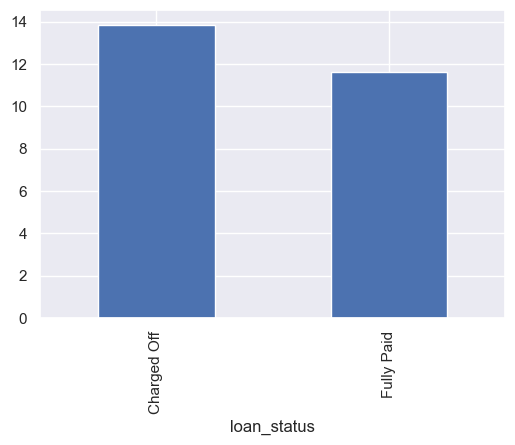

In [136]:
# same details in the bar graph.
plt.rcParams['figure.figsize'] = (6,4)
df1.groupby('loan_status')['int_rate'].mean().plot(kind='bar')
plt.show()

In [137]:
#int_rate seems important as the inerest rate is high for charged off loans. Lets add this to important features list.
imp_features.append('int_rate')

We know that int_rate is imp. But it also changes based on the loan amount. So lets check same details against loan_amt.

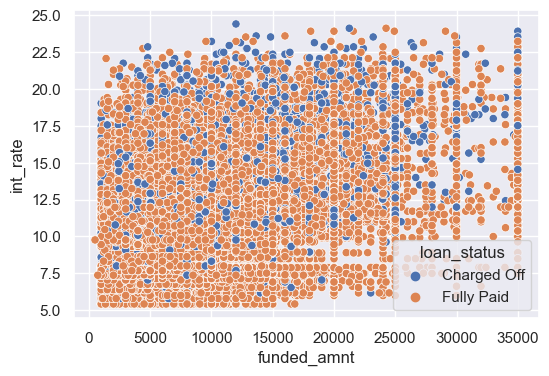

In [138]:
# Loan Amount column shows the charged off values for higher interest rates.
sns.scatterplot(x=df1.funded_amnt, y=df1.int_rate, hue=df1.loan_status)
plt.show()

Here, we see that the Charged Off loans are spread across all the loan amounts. And they do have higher rate of interest. 

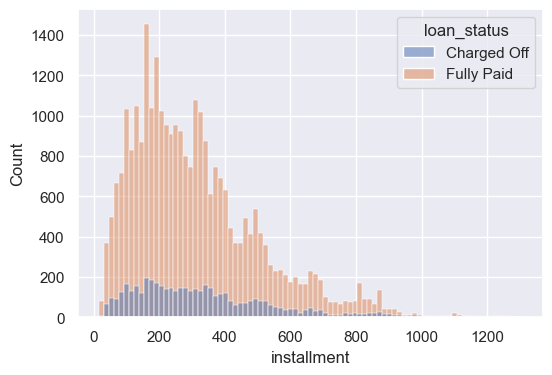

In [139]:
# Lets check if Installment Amount makes any difference on out target column.
sns.histplot(x=df1.installment, hue=df1.loan_status)
plt.show()
# Installment amount does not show difference. We find charged off cases across all values of installment. 
# We do see there are some outliers. 

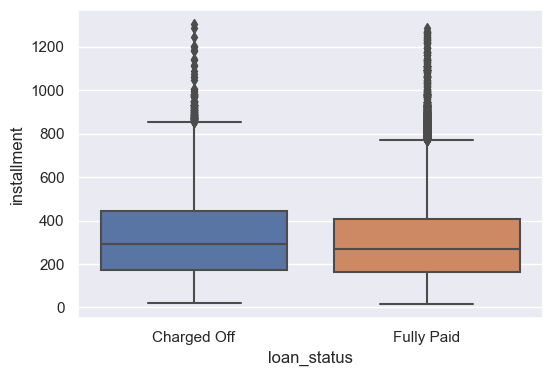

In [140]:
# installment column seems very similar
sns.boxplot(x=df1.loan_status, y=df1.installment, data=df1)
plt.show()

In [142]:
df1.groupby('loan_status')['grade'].value_counts()

loan_status  grade
Charged Off  B        1214
             C        1151
             D         950
             E         598
             A         506
             F         262
             G          87
Fully Paid   B        9027
             A        8300
             C        5723
             D        3498
             E        1682
             F         561
             G         161
Name: grade, dtype: int64

<Axes: xlabel='loan_status,grade'>

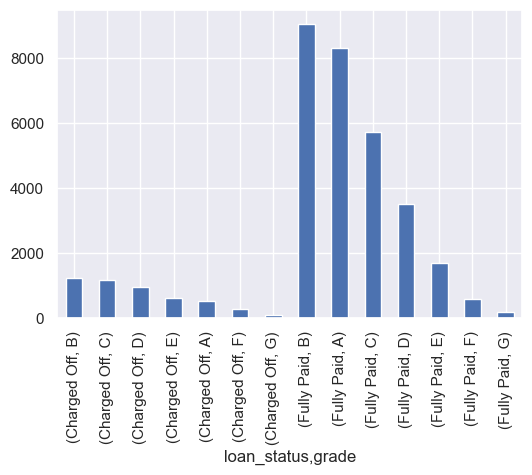

In [144]:
df1.groupby('loan_status')['grade'].value_counts().plot(kind='bar')

Apart from Grade column we also have a Sub grade column. Lets check that too. 

In [145]:
df1.groupby('loan_status')['sub_grade'].value_counts()

loan_status  sub_grade
Charged Off  B5           324
             B3           295
             C1           281
             C2           278
             B4           276
                         ... 
Fully Paid   F5            43
             G2            39
             G4            34
             G3            20
             G5            11
Name: sub_grade, Length: 70, dtype: int64

<Axes: xlabel='loan_status,sub_grade'>

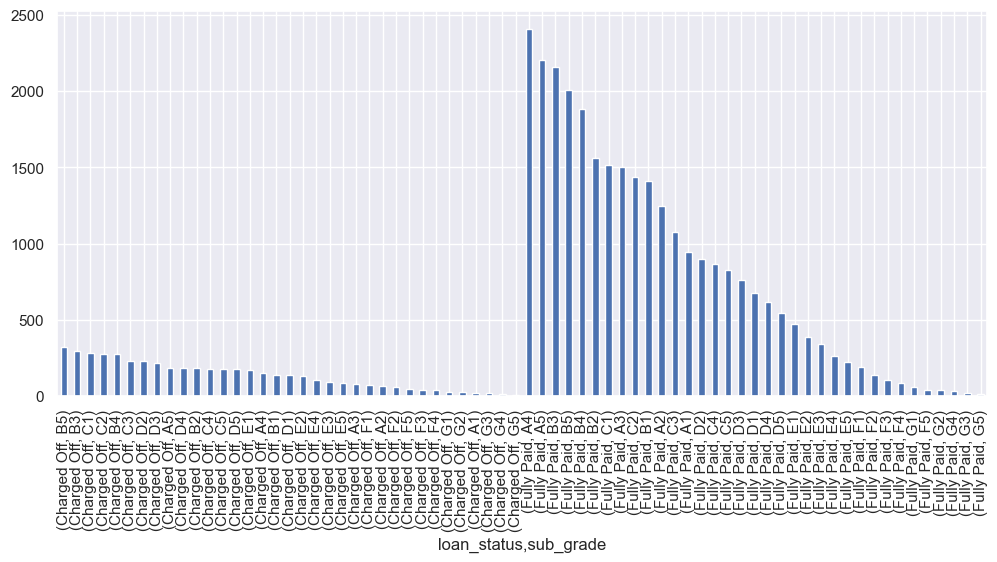

In [147]:
plt.rcParams['figure.figsize'] = (12,5)
df1.groupby('loan_status')['sub_grade'].value_counts().plot(kind='bar')

In [129]:
# Lets change figure size to see the plot.
plt.rcParams['figure.figsize'] = (12, 3)

<Axes: xlabel='loan_status,sub_grade'>

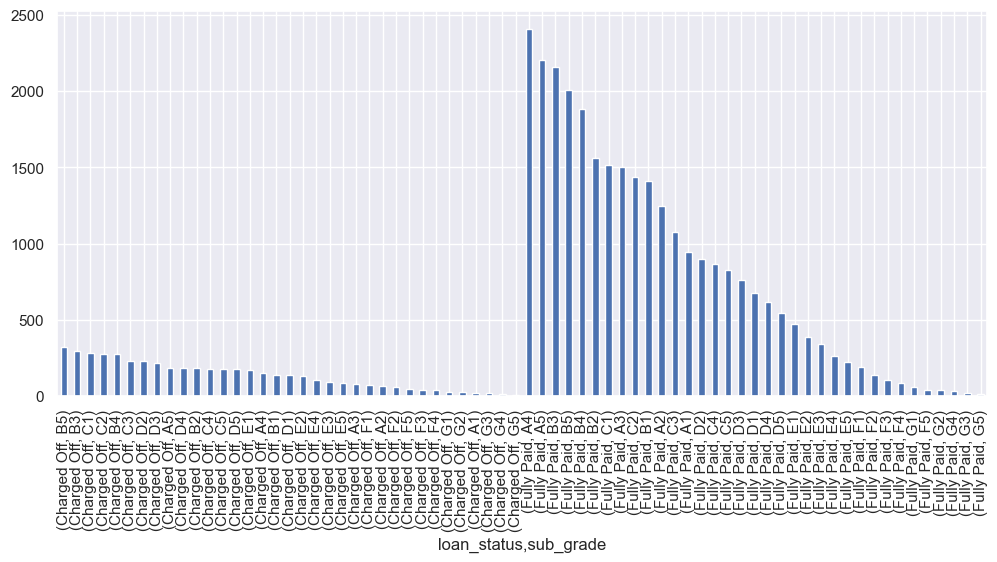

In [149]:
df1.groupby('loan_status')['sub_grade'].value_counts().plot(kind='bar')

It appears that there is not a definite pattern in fully paid and charged off loans. 

In [150]:
# Lets check emp_length: Remaining employment in years column
df1.groupby('loan_status')['emp_length'].mean()

loan_status
Charged Off    5.136745
Fully Paid     4.917760
Name: emp_length, dtype: float64

<Axes: xlabel='emp_length'>

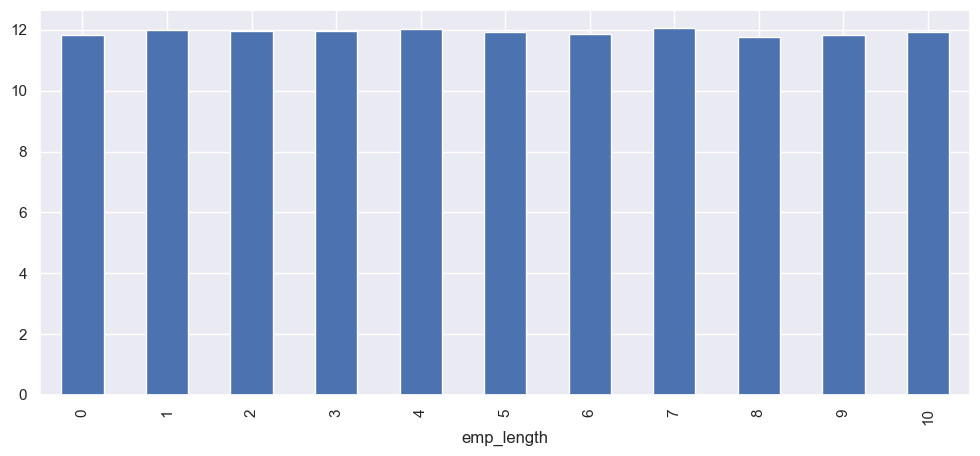

In [151]:
# lets check if int_rate varies across emp_length
df1.groupby('emp_length')['int_rate'].mean().plot(kind='bar')
# Mean rate of interest is almost similar across all emp length.

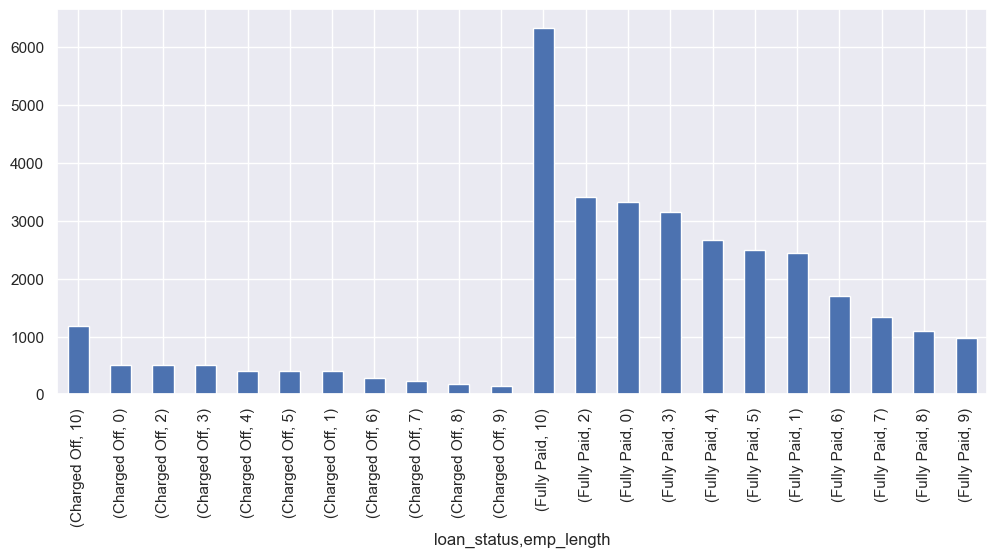

In [152]:
df1.groupby('loan_status')['emp_length'].value_counts().plot(kind='bar')
plt.show()
# emp_length is not a useful feature as there are all the lengths for each status

In [153]:
plt.rcParams['figure.figsize'] = (8, 5)

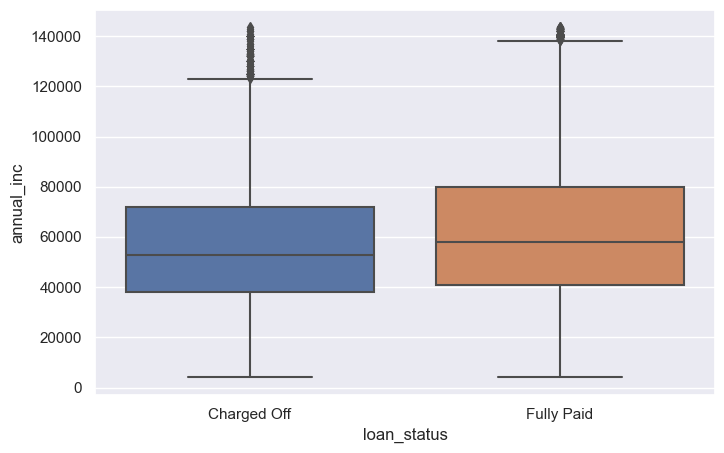

In [154]:
# lets check annual income variation
sns.boxplot(x='loan_status',y='annual_inc',data=df1)
plt.show()

Above plot shows us that there are quite a few outliers. So lets plot the values on log scale using numpy. 

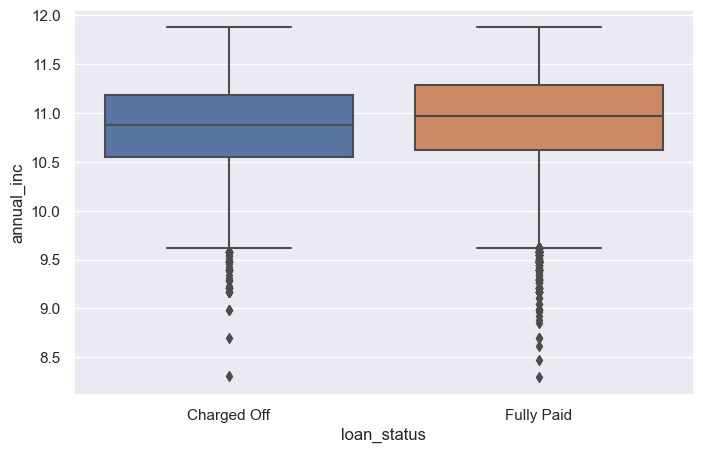

In [155]:
sns.boxplot(x='loan_status', y=np.log(df1['annual_inc']), data=df1)
plt.show()

In [157]:
print('Mean of the Annual income for all ', df1.groupby('loan_status')['annual_inc'].mean())
print('-'*40)
print('Median of the Annual income for all ', df1.groupby('loan_status')['annual_inc'].median())
print('-'*40)
print('Minimum Annual income for all ', df1.groupby('loan_status')['annual_inc'].min())
print('-'*40)
print('Maximum Annual income for all ', df1.groupby('loan_status')['annual_inc'].max())

Mean of the Annual income for all  loan_status
Charged Off    57329.587827
Fully Paid     62365.313874
Name: annual_inc, dtype: float64
----------------------------------------
Median of the Annual income for all  loan_status
Charged Off    52800.0
Fully Paid     58000.0
Name: annual_inc, dtype: float64
----------------------------------------
Minimum Annual income for all  loan_status
Charged Off    4080.0
Fully Paid     4000.0
Name: annual_inc, dtype: float64
----------------------------------------
Maximum Annual income for all  loan_status
Charged Off    143500.0
Fully Paid     143500.0
Name: annual_inc, dtype: float64


1. We see that the Mean of Charged Off Loans is little less and so is the median.

2. Maximum and the Minimum values are almost simillar. 

In [158]:
# lets check other columns
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'initial_list_status', 'pub_rec_bankruptcies'],
      dtype='object')

In [159]:
df1.verification_status.value_counts()

Not Verified       14521
Verified           10490
Source Verified     8709
Name: verification_status, dtype: int64

<Axes: xlabel='loan_status,verification_status'>

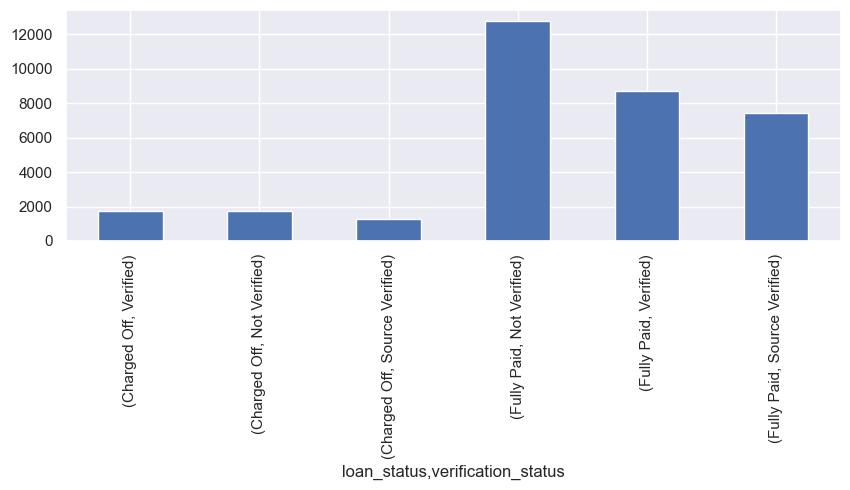

In [160]:
# verification_status column has chanrged off values.
plt.rcParams['figure.figsize'] = (10, 3)
df1.groupby('loan_status')['verification_status'].value_counts().plot(kind='bar')

Charged off loans are found across all the verification so it does not seemm very imp.

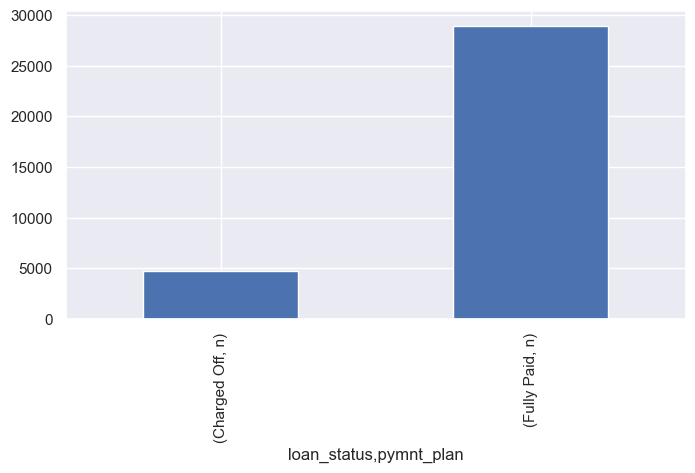

In [161]:
plt.rcParams['figure.figsize'] = (8, 4)
df1.groupby('loan_status')['pymnt_plan'].value_counts().plot(kind='bar')
plt.show()
# does not seem relevent as the column has only 1 value. 

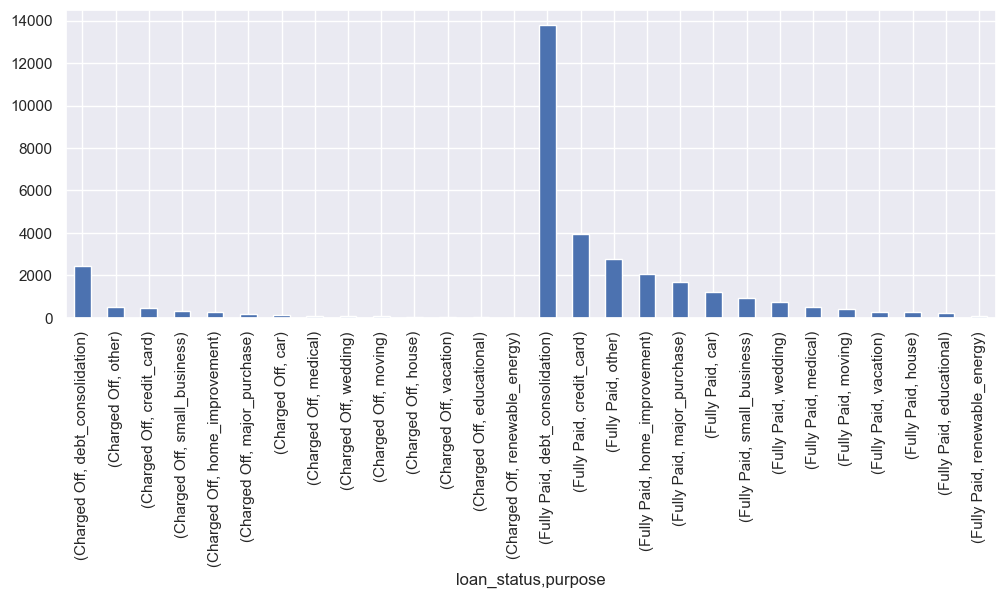

In [162]:
plt.rcParams['figure.figsize'] = (12, 4)
df1.groupby('loan_status')['purpose'].value_counts().plot(kind='bar')
plt.show()

We see there are higher count of loans which are taken for debt_consolidation. Lets check amount as well. 

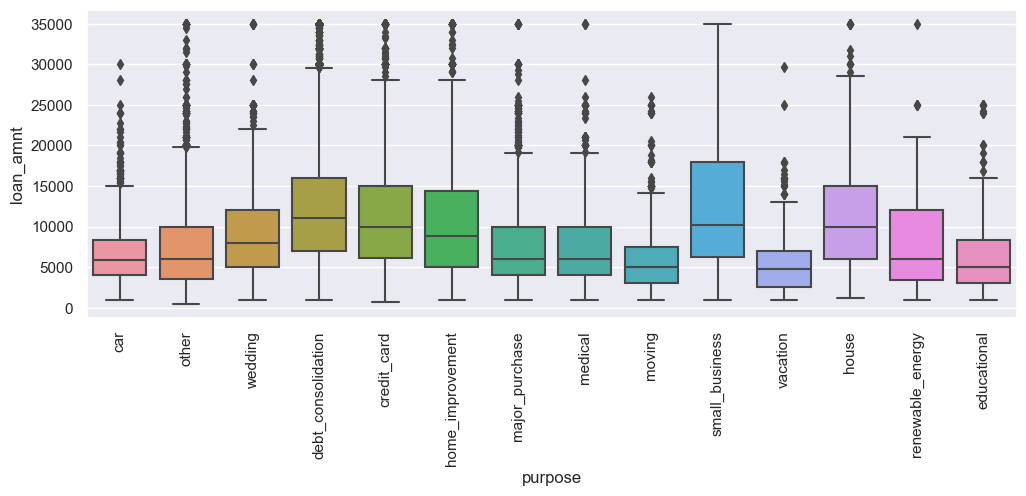

In [163]:
sns.boxplot(x='purpose', y='loan_amnt', data=df1)
plt.xticks(rotation=90)
plt.show()

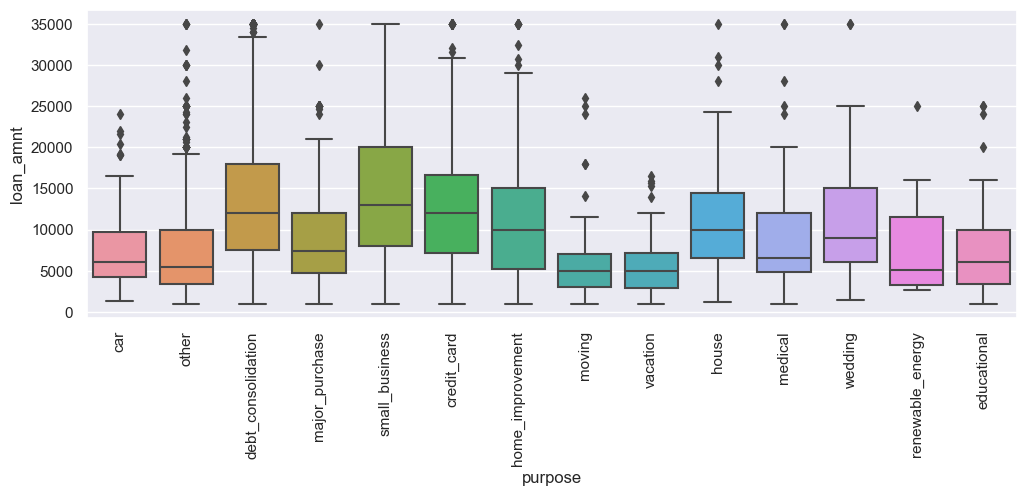

In [165]:
sns.boxplot(x='purpose', y='loan_amnt', data=df1[df1['loan_status']=='Charged Off'])
plt.xticks(rotation=90)
plt.show()

We see that there are higher chances of default when loan amount > 15k and loan is taken for debt_conslidation, small business and house.

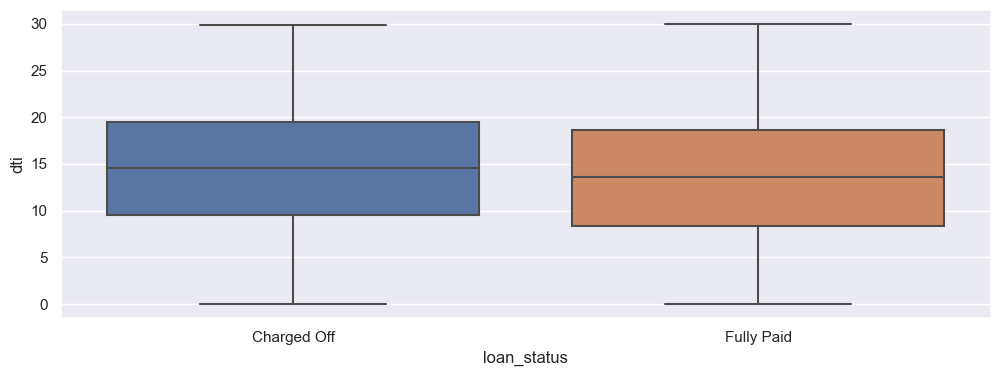

In [167]:
# dti variation  is pretty close
sns.boxplot(x='loan_status',y='dti',data=df1)
plt.show()

In [168]:
print('Mean of the dti for diff loan statuses', df1.groupby('loan_status')['dti'].mean())
print('-'*40)
print('Median of the dti for diff loan statuses', df1.groupby('loan_status')['dti'].median())
print('-'*40)
print('Minimum dti for diff loan statuses', df1.groupby('loan_status')['dti'].min())
print('-'*40)
print('Maximum dti for diff loan statuses', df1.groupby('loan_status')['dti'].max())

Mean of the dti for diff loan statuses loan_status
Charged Off    14.257752
Fully Paid     13.450429
Name: dti, dtype: float64
----------------------------------------
Median of the dti for diff loan statuses loan_status
Charged Off    14.560
Fully Paid     13.555
Name: dti, dtype: float64
----------------------------------------
Minimum dti for diff loan statuses loan_status
Charged Off    0.0
Fully Paid     0.0
Name: dti, dtype: float64
----------------------------------------
Maximum dti for diff loan statuses loan_status
Charged Off    29.85
Fully Paid     29.99
Name: dti, dtype: float64


In [169]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'initial_list_status', 'pub_rec_bankruptcies'],
      dtype='object')

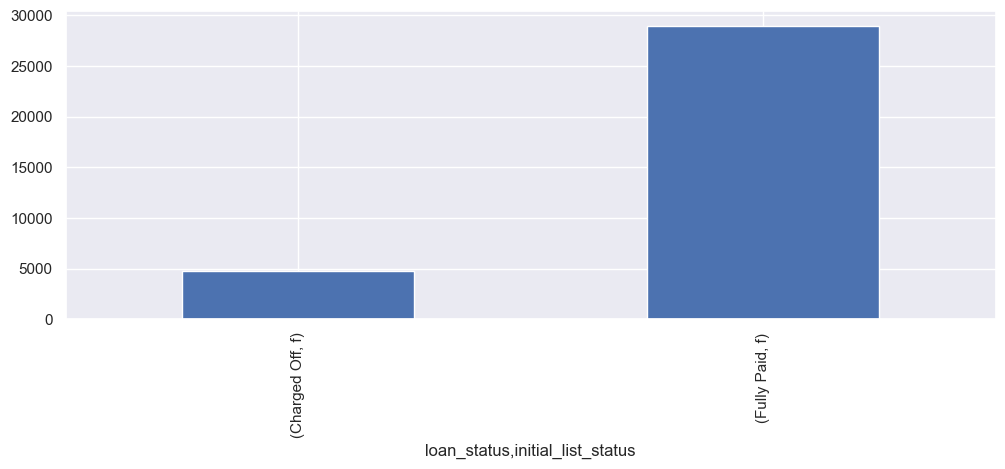

In [170]:
#initial_list_status
df1.groupby('loan_status')['initial_list_status'].value_counts().plot(kind='bar')
plt.show()
# column has only 1 value so it is not relevent.

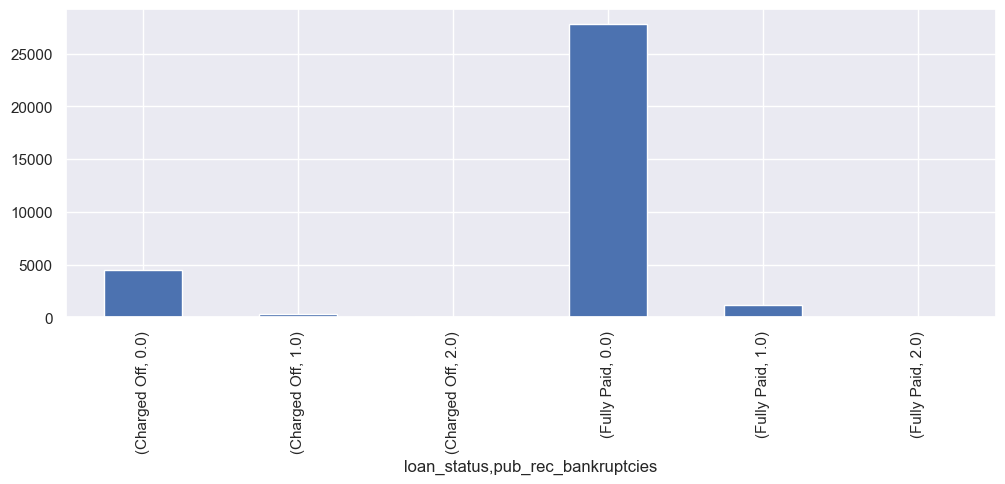

In [171]:
# pub_rec_bankruptcies
df1.groupby('loan_status')['pub_rec_bankruptcies'].value_counts().plot(kind='bar')
plt.show()

In [172]:
# pub_rec_bankruptcies
df1.groupby('loan_status')['pub_rec_bankruptcies'].value_counts()

loan_status  pub_rec_bankruptcies
Charged Off  0.0                      4459
             1.0                       307
             2.0                         2
Fully Paid   0.0                     27826
             1.0                      1123
             2.0                         3
Name: pub_rec_bankruptcies, dtype: int64

Based on the volumn, it seems higher no of defaulters are with no banckrupties.

In [173]:
df1['home_ownership'].value_counts()

RENT        16660
MORTGAGE    14551
OWN          2420
OTHER          89
Name: home_ownership, dtype: int64

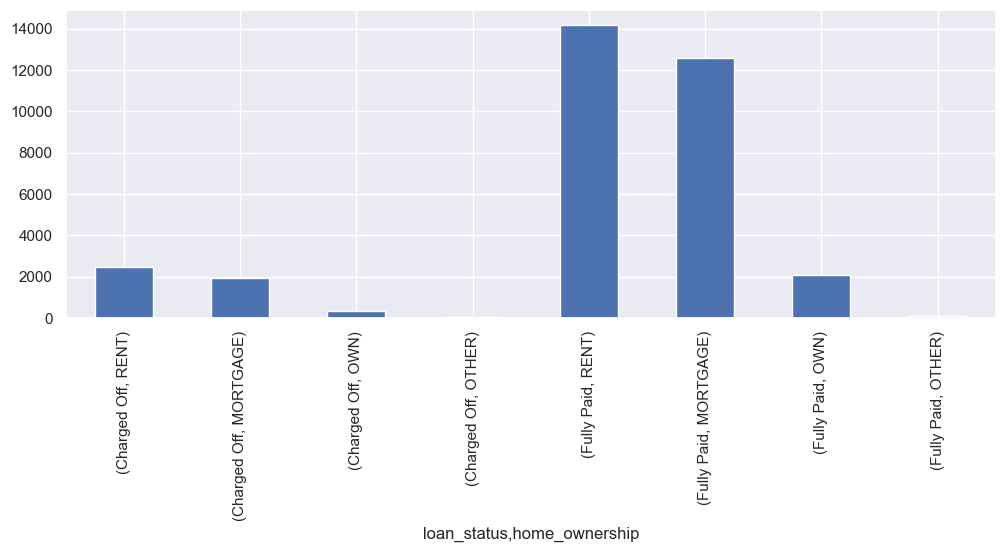

In [174]:
df1.groupby('loan_status')['home_ownership'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='home_ownership', ylabel='count'>

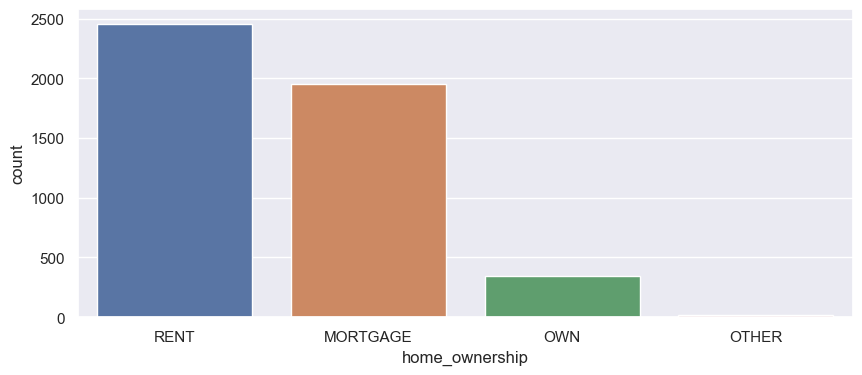

In [175]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.countplot(x='home_ownership', data=df1[df1['loan_status']=='Charged Off'])

Thre are large number of defaulters who live in rented home or in mortgaged hoouse. 

In [176]:
imp_features.append('home_ownership')

In [177]:
df1.issue_d.describe()

count      33720
unique        52
top       Dec-11
freq        1851
Name: issue_d, dtype: object

In [178]:
# Lets check Issue Date. The values we have are as follows.
df1.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Aug-07'], dtype=object)

In [179]:
#From above values we can derive other values such as month, year and quarter. 
#But before that, lets convert Object dtype to Datetime format. Using the below codes for datetime conversion.
# %b - Abbreviated Month name. %y - 2 digit Year
df1['issue_d']=pd.to_datetime(df1['issue_d'], format='%b-%y')

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\2636857057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['issue_d']=pd.to_datetime(df1['issue_d'], format='%b-%y')


In [180]:
# now lets derive another columns from it. 
df1['issue_year'] = pd.DatetimeIndex(df1['issue_d']).year
df1['issue_month'] = pd.DatetimeIndex(df1['issue_d']).month

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\1453153146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['issue_year'] = pd.DatetimeIndex(df1['issue_d']).year
C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\1453153146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['issue_month'] = pd.DatetimeIndex(df1['issue_d']).month


In [181]:
# issue_quarter column needs to be identified from the month column.
# lets create a function for the same
def create_issue_quarter(col):
    if col <= 3:
        quarter='Q1'
    elif col >= 4 and col <= 6:
        quarter='Q2'
    elif col >= 7 and col <= 9:
        quarter='Q3'
    elif col >= 10 and col <= 12:
        quarter='Q4'
    else:
        quarter='00'
    return quarter
df1['issue_quarter'] = df1.apply(lambda x : create_issue_quarter(x['issue_month']), axis=1)

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\1567269723.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['issue_quarter'] = df1.apply(lambda x : create_issue_quarter(x['issue_month']), axis=1)


In [182]:
df1['issue_quarter'].unique()
# Good the we didnt find any '00' as those would have been errors

array(['Q4', 'Q3', 'Q2', 'Q1'], dtype=object)

In [183]:
df1['issue_quarter'].describe()

count     33720
unique        4
top          Q4
freq      10422
Name: issue_quarter, dtype: object

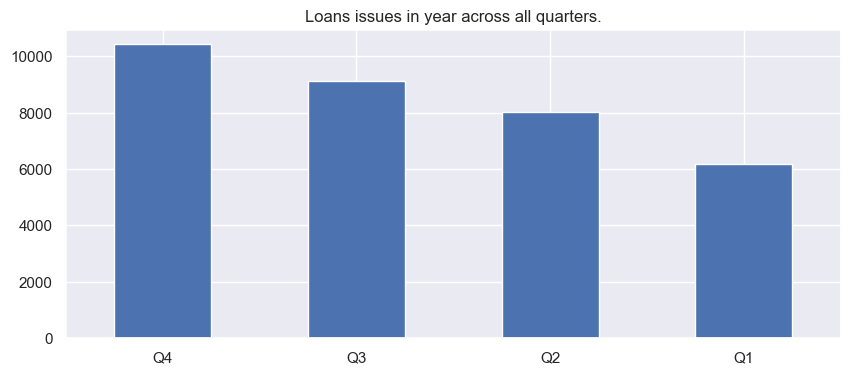

In [186]:
df1['issue_quarter'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Loans issues in year across all quarters.')
plt.show()
# As we see, the max loans have been given in the 3rd and 4h quarters of the year. 

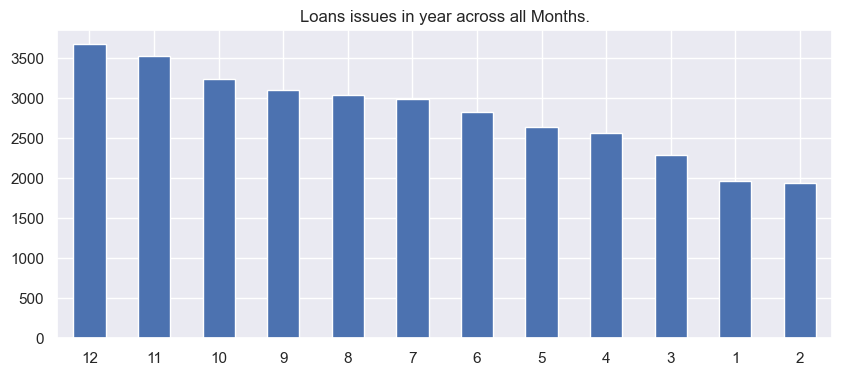

In [185]:
df1['issue_month'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Loans issues in year across all Months.')
plt.show()

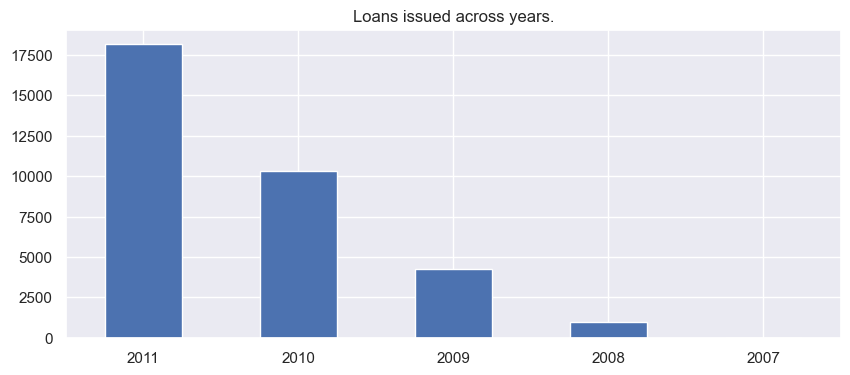

In [187]:
df1['issue_year'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Loans issued across years.')
plt.show()

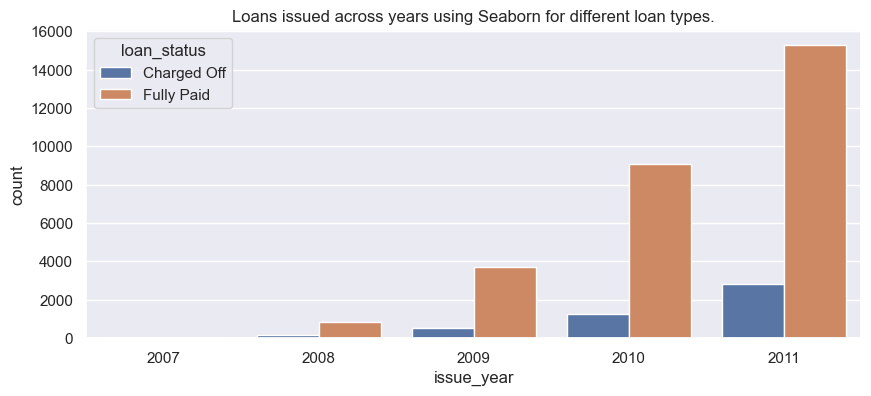

In [191]:
sns.countplot(x='issue_year', data=df1, hue='loan_status')
plt.title('Loans issued across years using Seaborn for different loan types.')
plt.show()

Loan applications are definitely increasing each year.

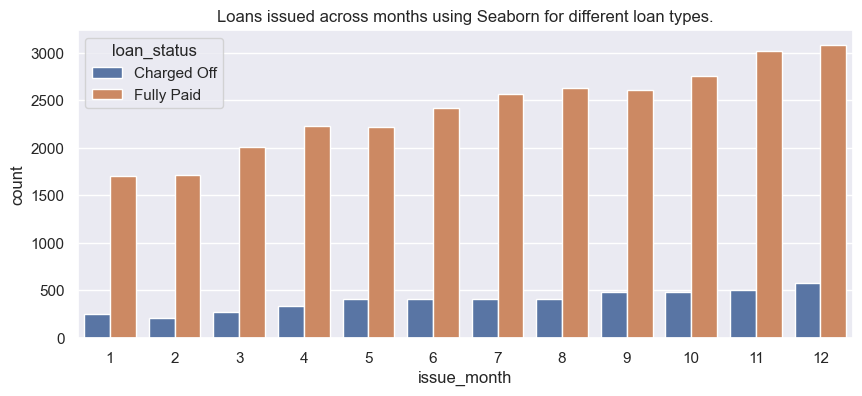

In [190]:
sns.countplot(x='issue_month', data=df1, hue='loan_status')
plt.title('Loans issued across months using Seaborn for different loan types.')
plt.show()
#More loans are taken post March and April. This could be because of festive season

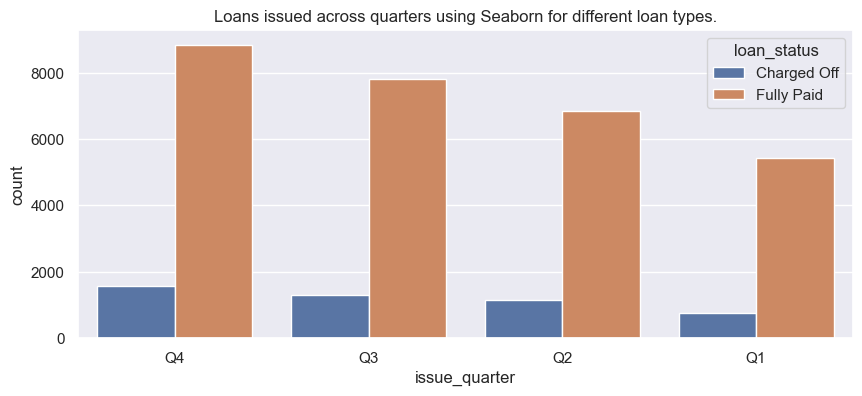

In [192]:
sns.countplot(x='issue_quarter', data=df1, hue='loan_status')
plt.title('Loans issued across quarters using Seaborn for different loan types.')
plt.show()

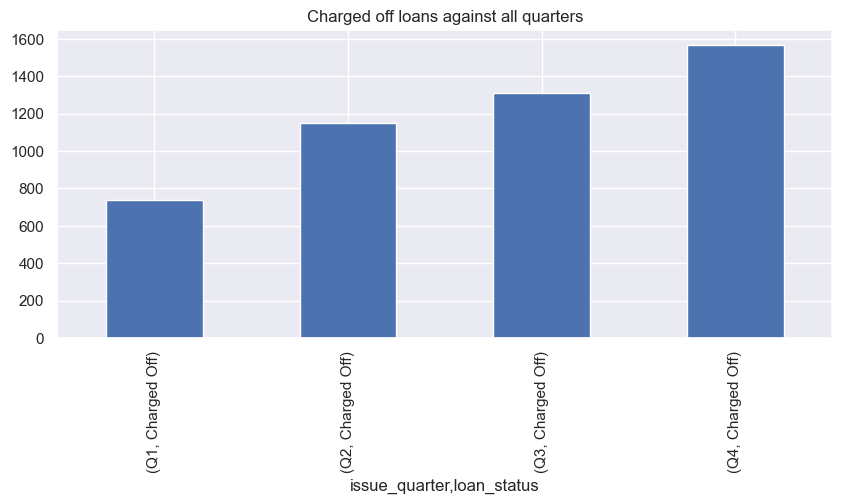

In [193]:
# Lets check only charged off loans
df1[df1['loan_status']=='Charged Off'].groupby('issue_quarter')['loan_status'].value_counts().plot.bar()
plt.title('Charged off loans against all quarters')
plt.show()

Charged Off loans increase as the quarter moves to end of the year. From Q1 to Q4, the amount of defaulters are increased by 2 fold. 

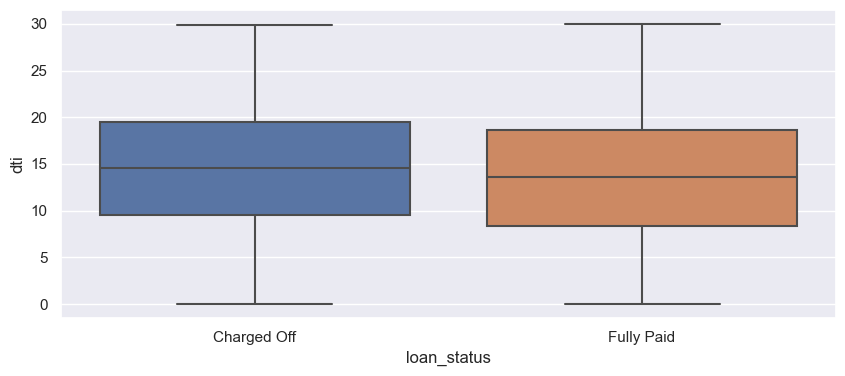

In [194]:
# dti variation is pretty close
sns.boxplot(x='loan_status',y='dti',data=df1)
plt.show()

In [195]:
df1.groupby('loan_status')['dti'].mean()

loan_status
Charged Off    14.257752
Fully Paid     13.450429
Name: dti, dtype: float64

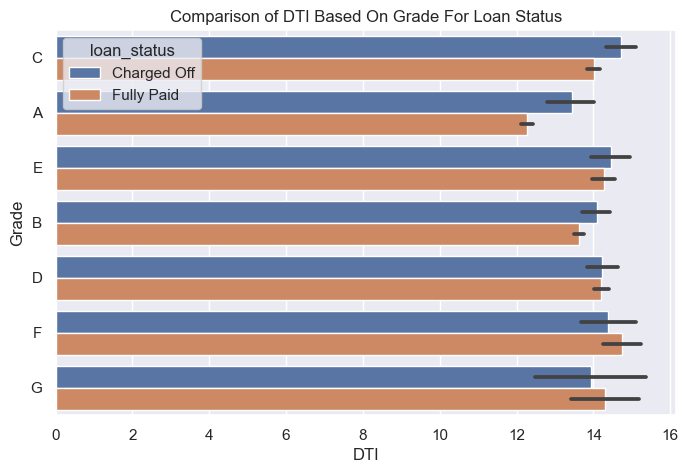

In [199]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(8,5))
sns.barplot(data=df1,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status')
plt.show()

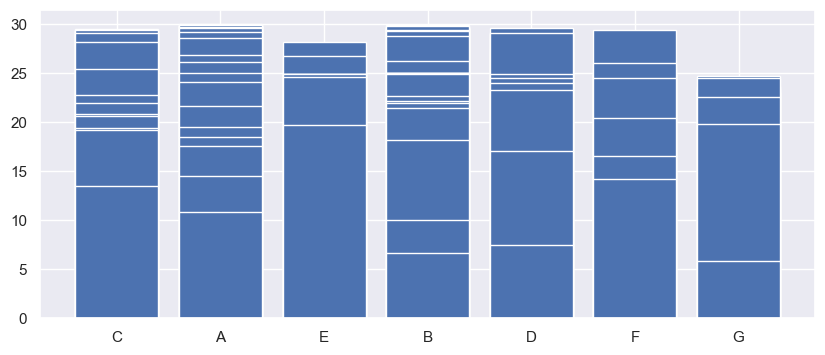

In [213]:
plt.bar(x='grade', height='dti', data=df1)
plt.show()

In [211]:
df1.dti.head()

1     1.00
3    20.00
5    11.20
6    23.51
7     5.35
Name: dti, dtype: float64

If we check the ratio, we see that Grade A loans has highest ratio and high defaulters.  

In [214]:
imp_features.append('dti')

imp_features

In [215]:
imp_features.append('loan_status')

In [216]:
imp_features

['loan_amt',
 'term',
 'grade',
 'int_rate',
 'home_ownership',
 'dti',
 'loan_status']

In [221]:
df2 = df1.loc[:, df1.columns.isin(imp_features)]
df2.head()

,term,int_rate,grade,home_ownership,loan_status,dti
1,60 months,15.27,C,RENT,Charged Off,1.00
3,36 months,13.49,C,RENT,Fully Paid,20.00
5,36 months,7.90,A,RENT,Fully Paid,11.20
6,60 months,15.96,C,RENT,Fully Paid,23.51
7,36 months,18.64,E,RENT,Fully Paid,5.35


Creating the correlation matrix for all the columns to understand the dependency

In [222]:
df2.corr()
# beow correlation matrix gave only integer values so we need to convert rest of the values into integer too.

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,int_rate,dti
int_rate,1.000000,0.112554
dti,0.112554,1.000000


In [223]:
df2['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [226]:
df2['term_int'] = df2['term'].apply(lambda x: 1 if x ==' 60 months' else (0 if x ==' 36 months' else 100) )
df2['term_int'].unique()

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\113359325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['term_int'] = df2['term'].apply(lambda x: 1 if x ==' 60 months' else (0 if x ==' 36 months' else 100) )


array([1, 0], dtype=int64)

In [227]:
df2.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

##  Inferences
#### Purpose 
We see there are higher count of loans which are taken for debt_consolidation.
#### Grade
The Grade represent risk factor thus we can say interst rate increases with the risk.
The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
#### Public Recorded Bankruptcy
The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.
#### Term
The majority of loan has a term of 36 months compared to 60 months.
The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
#### Interest Rate
The default loan amount increases with interest rate 
#### Invested Amount
mean value of funded amount invested is little higher for Charged Off loans. 

In [228]:
print('Major Facrots driving the Defaulted Loans are below')
print(imp_features)

Major Facrots driving the Defaulted Loans are below
['loan_amt', 'term', 'grade', 'int_rate', 'home_ownership', 'dti', 'loan_status']


In [229]:
df_corr=df2.corr()

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\60281616.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,int_rate,dti,term_int
int_rate,1.000000,0.112554,0.437574
dti,0.112554,1.000000,0.077885
term_int,0.437574,0.077885,1.000000


C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\3614285277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


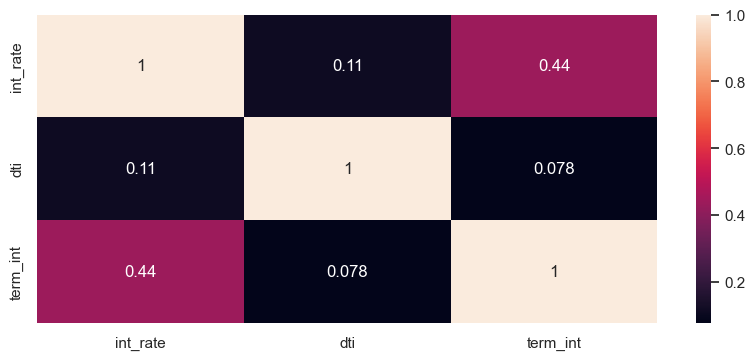

In [233]:
sns.heatmap(df2.corr(), annot=True)
plt.show()

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\3670567809.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


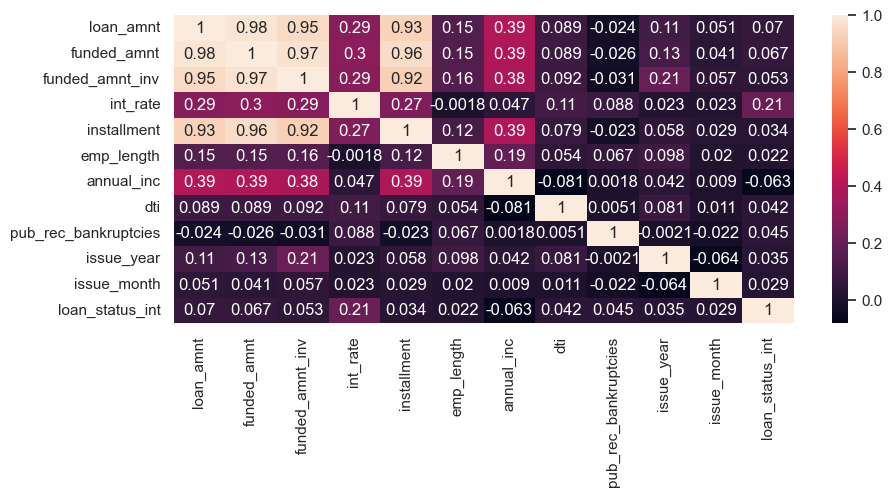

In [239]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [237]:
df1['loan_status_int']= df1['loan_status'].apply(lambda x : 1 if x == 'Charged Off' else 0)

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\1074510982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan_status_int']= df1['loan_status'].apply(lambda x : 1 if x == 'Charged Off' else 0)


In [236]:
df1.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [238]:
df1. loan_status_int.unique()

array([1, 0], dtype=int64)

C:\Users\u330743\AppData\Local\Temp\ipykernel_14884\3670567809.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


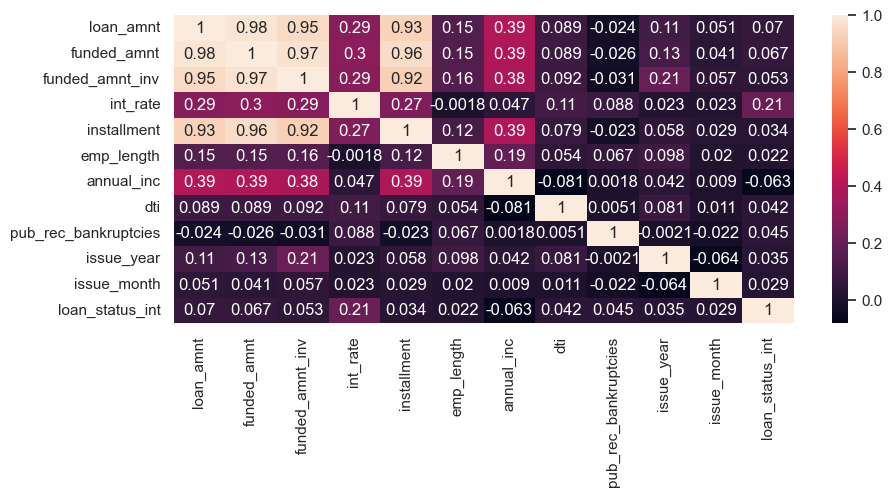

In [240]:
sns.heatmap(df1.corr(), annot=True)
plt.show()